In [1]:
## Bowling Analysis
#Bowler performance based on economy rate and wickets.


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(CASE WHEN bd.is_wicket = 1 THEN 1 END) AS wickets,
    SUM(bd.runs_total) AS runs_conceded,
    COUNT(*) AS balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 24
"""
df = pd.read_sql(query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_30872\3586635392.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


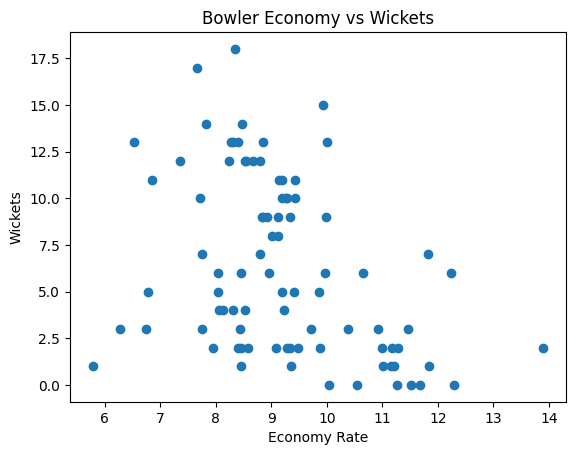

In [3]:
df["overs"] = df["balls"] / 6
df["economy"] = df["runs_conceded"] / df["overs"]

plt.figure()
plt.scatter(df["economy"], df["wickets"])
plt.xlabel("Economy Rate")
plt.ylabel("Wickets")
plt.title("Bowler Economy vs Wickets")
plt.show()


(141, 6)


C:\Users\hp\AppData\Local\Temp\ipykernel_30872\69864942.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Text(0.5, 1.0, 'Dot Ball %')

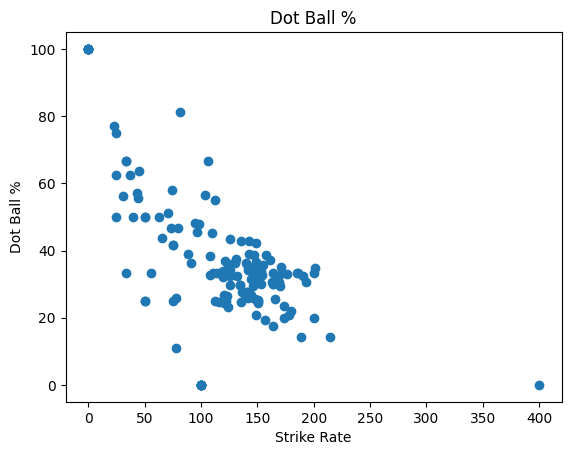

In [4]:
query = """
SELECT
    p.player_name,
    COUNT(*) AS balls,
    SUM(bd.runs_batter) AS runs,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 1
"""
df = pd.read_sql(query, conn)

df["strike_rate"] = (df["runs"] / df["balls"]) * 100
df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100
print(df.shape)
df.head()

plt.figure()
plt.scatter(df["strike_rate"], df["dot_ball_pct"])
plt.xlabel("Strike Rate")
plt.ylabel("Dot Ball %")
plt.title("Dot Ball %")


In [5]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS balls,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 50
"""
df = pd.read_sql(query, conn)

df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100
df = df.sort_values("dot_ball_pct", ascending=False).head(10)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_30872\1929096436.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,balls,dot_balls,dot_ball_pct
67,XC Bartlett,54,25.0,46.296296
20,KK Ahmed,198,90.0,45.454545
0,JR Hazlewood,225,101.0,44.888889
43,M Prasidh Krishna,216,89.0,41.203704
39,Mohammed Siraj,221,88.0,39.819005
55,B Kumar,209,83.0,39.712919
8,Harshit Rana,182,71.0,39.010989
7,CV Varun,213,83.0,38.967136
25,DL Chahar,192,73.0,38.020833
45,Arshdeep Singh,179,68.0,37.988827


In [6]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS sixes_conceded
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.is_six = 1
GROUP BY p.player_name
ORDER BY sixes_conceded DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_30872\2817766506.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,sixes_conceded
0,Ravi Bishnoi,21
1,Rashid Khan,19
2,KK Ahmed,17
3,SN Thakur,17
4,PWH de Silva,17
5,Mukesh Kumar,16
6,JR Hazlewood,16
7,PJ Cummins,16
8,V Nigam,15
9,Mohammed Shami,15


In [7]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS fours_conceded
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours_conceded DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_30872\602396491.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,fours_conceded
0,JC Archer,41
1,MA Starc,40
2,JR Hazlewood,34
3,SN Thakur,33
4,Arshdeep Singh,33
5,VG Arora,33
6,Mohammed Siraj,33
7,Ravi Bishnoi,32
8,Avesh Khan,31
9,Yash Dayal,31


In [8]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.runs_total = 0
  AND bd.is_wide = 0
  AND bd.is_no_ball = 0
GROUP BY p.player_name
ORDER BY dot_balls DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_30872\3250593077.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,dot_balls
0,JR Hazlewood,101
1,KK Ahmed,90
2,M Prasidh Krishna,89
3,Mohammed Siraj,88
4,JC Archer,87
5,B Kumar,83
6,CV Varun,83
7,TA Boult,79
8,Kuldeep Yadav,79
9,DS Rathi,76
